In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [110]:
df = pd.read_json("Employment - Unemployment Rate.json")
df.tail()

,Profile Year,DC-VA-MD-WV Metropolitan Statistical Area,Arlington County,ArlingtonCivilian Labor Force
10,2020,0.031,0.019,155769.0
11,2021,0.063,0.043,155891.0
12,2022,0.049,0.031,149472.0
13,2023,0.034,0.021,153172.0
14,2024,0.026,0.021,162626.0


In [111]:
df.columns

Index(['Profile Year', 'DC-VA-MD-WV Metropolitan Statistical Area',
       'Arlington County', 'ArlingtonCivilian Labor Force'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Profile Year                               15 non-null     int64  
 1   DC-VA-MD-WV Metropolitan Statistical Area  15 non-null     float64
 2   Arlington County                           15 non-null     float64
 3   ArlingtonCivilian Labor Force              15 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 612.0 bytes


In [113]:
def calculatePercentage(v1):
    return (v1 - v1.shift()) / v1.shift()

exclude_columns = ['Profile Year']

for col in df.columns:
    if col not in exclude_columns and pd.api.types.is_numeric_dtype(df[col]):
        percent_change = calculatePercentage(df[col])
        df[f'% {col}'] = percent_change

In [114]:
df.set_index('Profile Year')

,DC-VA-MD-WV Metropolitan Statistical Area,Arlington County,ArlingtonCivilian Labor Force,% DC-VA-MD-WV Metropolitan Statistical Area,% Arlington County,% ArlingtonCivilian Labor Force
Profile Year,,,,,,
2010,0.062,0.044,137201.083333,NaN,NaN,NaN
2011,0.064,0.044,137368.250000,0.032258,0.000000,0.001218
2012,0.060,0.039,141853.250000,-0.062500,-0.113636,0.032649
2013,0.056,0.036,144012.083333,-0.066667,-0.076923,0.015219
2014,0.055,0.036,145046.250000,-0.017857,0.000000,0.007181
2015,0.050,0.034,144530.916667,-0.090909,-0.055556,-0.003553
2016,0.045,0.029,144282.166667,-0.100000,-0.147059,-0.001721
2017,0.038,0.026,146166.166667,-0.155556,-0.103448,0.013058
2018,0.037,0.025,149626.583333,-0.026316,-0.038462,0.023675


In [115]:
df['Arlington_Rank'] = df['Arlington County'].rank(ascending=True, method='first').astype(int)


df[['Profile Year','Arlington County','Arlington_Rank']].sort_values('Arlington_Rank')


,Profile Year,Arlington County,Arlington_Rank
10,2020,0.019,1
9,2019,0.020,2
13,2023,0.021,3
14,2024,0.021,4
8,2018,0.025,5
7,2017,0.026,6
6,2016,0.029,7
12,2022,0.031,8
5,2015,0.034,9
3,2013,0.036,10


In [116]:
for col in df:
    print(col)

Profile Year
DC-VA-MD-WV Metropolitan Statistical Area
Arlington County
ArlingtonCivilian Labor Force
% DC-VA-MD-WV Metropolitan Statistical Area
% Arlington County
% ArlingtonCivilian Labor Force
Arlington_Rank


Text(0.5, 1.0, 'Labor Force Count')

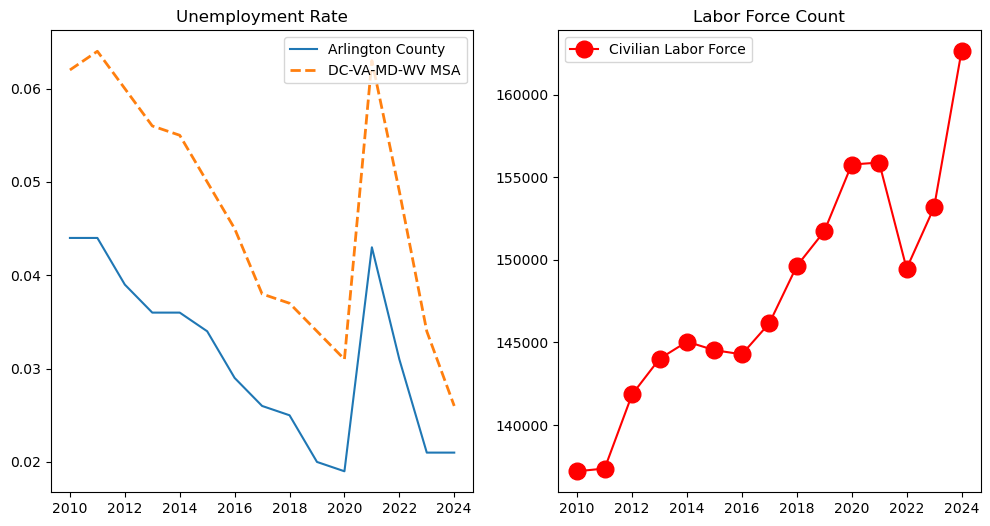

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
unemployment_rate = axes[0]
unemployment_rate.plot(df['Profile Year'], df['Arlington County'], label='Arlington County')
unemployment_rate.plot(df['Profile Year'], df['DC-VA-MD-WV Metropolitan Statistical Area'], label='DC-VA-MD-WV MSA',linestyle='dashed',linewidth=2)
unemployment_rate.legend(loc =1)
unemployment_rate.set_title('Unemployment Rate')
labor_stat = axes[1]
labor_stat.plot(df['Profile Year'], df['ArlingtonCivilian Labor Force'], label='Civilian Labor Force', color='red',marker='o',markersize=12)
labor_stat.legend()
labor_stat.set_title('Labor Force Count')

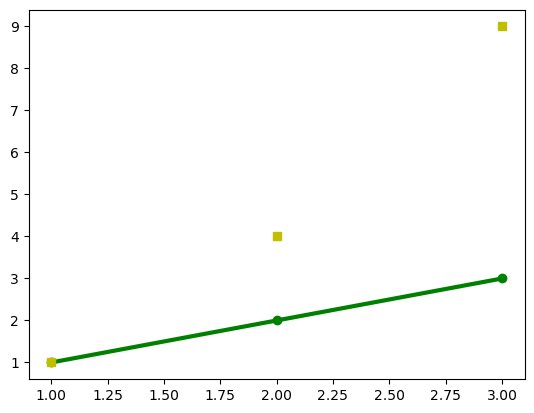

In [88]:
plt.plot([1, 2, 3], [1, 2, 3], 'go-', label='line 1', linewidth=3)
plt.plot([1, 2, 3], [1, 4, 9], 'ys')

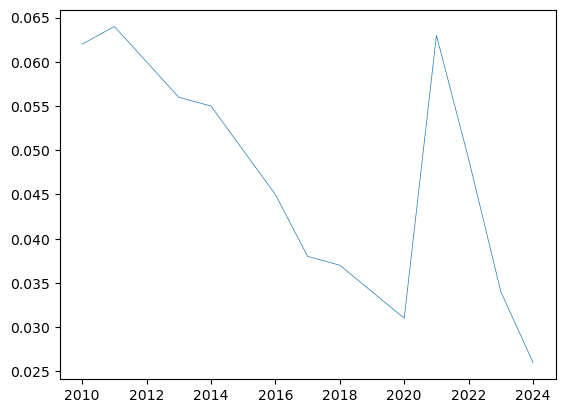

In [85]:
plt.plot('Profile Year', 'DC-VA-MD-WV Metropolitan Statistical Area', data = df, linewidth = 0.5)